Engy-4350: Nuclear Reactor Engineering Spring 2019 UMass Lowell; Prof. V. F. de Almeida **03Feb2019**

# 02. Nuclear Data and Data Processing 
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\uvar}{\boldsymbol{u}}
  \newcommand{\fvar}{\boldsymbol{f}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Power}{\mathcal{P}}
$

---
## Table of Contents
* [Objectives](#obj)
* [Introduction](#intro)
* [Radiative capture cross section example](#xs1)
* [Beta decay example](#beta1)

---

## Objectives<a id="obj"></a>
+ Demonstrate how to obtain traceable nuclear data and have them available through the notebook for analysis and problem solving.

## Introduction<a id="intro"></a>

Many nuclear data sets are availale through the US [National Nuclear Data Center](https://www.nndc.bnl.gov/). Some important sites are as follows:

+ [Interactive chart of nuclides](https://www.nndc.bnl.gov/nudat2/).
+ [Nuclide energy level and $\gamma$ emission](https://www.nndc.bnl.gov/nudat2/indx_adopted.jsp).
+ [Nuclear wallet card](https://www.nndc.bnl.gov/nudat2/indx_sigma.jsp).
+ [Decay radiation search](https://www.nndc.bnl.gov/nudat2/indx_dec.jsp)
+ [Q-value calculator](https://www.nndc.bnl.gov/qcalc/) (difference of kinetic energy of products and reactant particles in a nuclear reaction, *i.e.* energy release).
+ [Atomic mass evaluator](http://amdc.impcas.ac.cn/web/masseval.html).
+ [Evaluated nuclear data file (ENDF)](https://www.nndc.bnl.gov/exfor/endf00.jsp).
+ [Cross sections](https://www.nndc.bnl.gov/sigma/index.jsp) for many nuclear reactions.

Similarly from [IAEA](https://www-nds.iaea.org/) Nuclear Data Services. Some important sites are as follows:

+ [Live chart of nuclides](https://www-nds.iaea.org/relnsd/vcharthtml/VChartHTML.html)
+ [Search engine](https://www-nds.iaea.org/relnsd/NdsEnsdf/QueryForm.html)

In addition from France's [LNHB](http://www.lnhb.fr/nuclear-data/nuclear-data-table/):


## Radiative capture cross section $(n,\gamma)$ example<a id="xs1"></a>
This is a significant capture reaction emitting a prompt *capture* gamma ray

\begin{equation*}
^1_0\text{n} \ + \  ^{235}_{92}\text{U} \longrightarrow \ ^{236}_{92}\text{U}^* \overset{\approx 10^{-14}\,\text{s}}{\longrightarrow} \ ^{236}_{92}\text{U} \ + \ \gamma    ,
\end{equation*}

Note: 
+ a) over much of the neutron energy range in a nuclear reactor this is the only possible parasitic reaction that influences neutron balance; 
+ b) often this reaction is the dominat source of radiation heating and bulk shielding in the reactor vessel; 
+ c) the product nuclide is often unstable, decaying via beta emission and delayed gamma rays; the latter continues for years after reactor shutdown.



Acquiring cross section data and saving it to a file:

 + Using the [cross section data site](https://www.nndc.bnl.gov/sigma/index.jsp) click on U in the periodic table and choose $^{235}_{92}$U from the isotope list. 
 + Select the neutron capture reaction cross section $^{235}_{92}$U(n,$\gamma$) and plot the data. 
 + Choose `view evaluated data` and click on the `Text` link to view the data in a two-column arrangement (energy versus cross section). 
 + Using the browser, save data to a text file (`u-235-sigma-c.dat`). Relocate the file in a directory `data/` relative to this notebook.

In [ ]:
'''View the raw data'''
!cat data/u-235-sigma-g.dat

Importing and processing tabular data is readily done using the Pandas Python Package:
 + [Pandas documentation](https://pandas.pydata.org/).

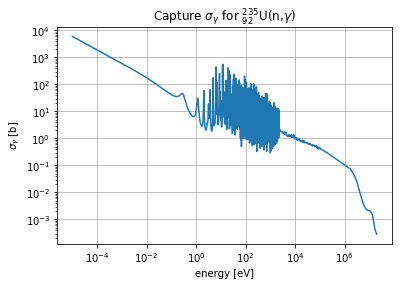

In [19]:
'''Visualize the data'''

# Pandas: python package for tabular data analysis
import pandas as pd

# read the data into a data frame (or table)
df = pd.read_csv('data/u-235-sigma-g.dat', 
                  names=['energy [eV]','sigma_g [b]'], 
                  skiprows=3)

#print(df) # uncomment for a screen output of the data

# plot the data directly from Pandas
ax = df.plot(loglog=True, x='energy [eV]', y='sigma_g [b]',legend=False,
             title='Capture $\sigma_\gamma$ for $^{235}_{92}$U(n,$\gamma$)')
ax.set(ylabel='$\sigma_\gamma$ [b]')
ax.grid()

Using the [IAEA search engine](https://www-nds.iaea.org/relnsd/NdsEnsdf/QueryForm.html) obtain the radius of the nucleus of $^{235}_{92}$U to be $r=5.8337$ fm. Calculate the cross sectional area of the nucleus and compare with the radiative cross section in the plot.

In [21]:
import math
r = 5.8337
area = math.pi * r**2
print('nucleus cross section area [b] = %5.5f'%(area/100)) # 1 barn = 100 fm^2

nucleus cross section area [b] = 1.06915


From the radiative capture cross section data (plot): $\sigma_g = 101.153$ b at $E=2.4\, 10^{-2}$ eV. Therefore the geometric cross section of the nucleus is 1/100 of the capture reaction cross section.

## $\beta^-$ decay example<a id="beta1"></a>
This is an electron ejected from the nucleus by a neutron to proton transformation via several different nuclear transitions. The transformation is mediated by the weak nuclear forces. This disintegration is often followed by secondary phenomena accompanying the nuclear transition, *e.g.*, 
 + internal bremsstrahlung photon energy (shared by the beta and anti-neutrino particles) due to a slowed down electron in the field of the nucleus,
 + internal ionization and excitation of the nucleus due to a sudden change of charge causes the emission of an orbital electron (an energy conversion electron).
 + the orbital vacancy is filled in by a cascade of electrons from higher orbital which leads to the emission of x-rays.
 + the energy of the vacancy is passed to higher orbital electrons and a valence electron is ejected called an Auger electron.
 
 Each one has a unique *endpoint energy*, the maximum kinetic energy of the electron or $\beta^-$ particle.

\begin{equation*}
 ^{90}_{39}\text{Y} \overset{64.2\,\text{h}}{\longrightarrow} \ ^{90}_{40}\text{Zr}^+ \ + \beta^- (^0_{-1}e) \ +\  \ \overline{\nu}_e    ,
\end{equation*}

+ Using the [decay radiation search site](https://www.nndc.bnl.gov/nudat2/indx_dec.jsp) search for $^{90}_{39}$Y.
+ Use the standard style for uncertainty.
+ On the window result look for the ground-state data set.
+ View the HTML page source, copy the contents and paste into a Markdown cell below.

<p><u>Dataset #3:</u>
<p><u>Author</u>:
E. Browne&nbsp;&nbsp;
<u>Citation</u>:Nuclear Data Sheets  82, 379 (1997)
<p><table border=0 cellspacing=1 cellpadding=2 bgcolor=navy><tr><td align=center valign=center class=shead>Parent <br> Nucleus</td><td align=center valign=center class=shead>Parent <br> E(level)</td><td align=center valign=center class=shead>Parent <br> J&pi;</td><td align=center valign=center class=shead>Parent <br> T<sub>1/2</sub></td><td align=center valign=center class=shead>Decay Mode&nbsp;</td><td align=center valign=center class=shead>GS-GS Q-value <br> (keV) </td><td align=center valign=center class=shead>Daughter <br> Nucleus</td><td nowrap align=center rowspan=2 class=shead>&nbsp; </td><td nowrap align=center rowspan=2 class=shead>&nbsp; </td></tr>
<tr><td nowrap align=center bgcolor=white><table border=0 cellspacing=0 cellpadding=0><tr><td class=su align=right>90<br>39</td><td>Y</td></tr></table></td><td nowrap align=center class=align bgcolor=white> &nbsp;0<i></i> &nbsp; </td><td nowrap align=center class=align bgcolor=white> &nbsp;2-&nbsp; </td><td nowrap align=center class=align bgcolor=white> &nbsp;64.00 h <i>0.21</i>&nbsp;&nbsp; </td><td nowrap align=center class=align bgcolor=white> &nbsp;&beta;<sup>-</sup>: 100 <i>  </i>  %&nbsp; </td><td nowrap align=center class=align bgcolor=white> &nbsp;2280.1&nbsp;<i>1.6&nbsp; </td><td nowrap align=center class=align bgcolor=white> &nbsp;<table border=0 cellspacing=0 cellpadding=0><tr><td class=su align=right>90<br>40</td><td>Zr</td></tr></table>&nbsp; </td></tr></table>
<p><u>Beta-</u>:
<p><table border=0 cellspacing=4 cellpadding=2>
<tr>
<td align=center class=align>Energy <br> (keV)</td>
<td align=center class=align>End-point energy <br> (keV)</td>
<td align=center class=align>Intensity <br> (%)</td>
<td align=center class=align>Dose <br>( MeV/Bq-s )</td>
</tr>
<tr>
<td align=center><hr color="#bfbfbf" size=1 noshade></td>
<td align=center><hr color="#bfbfbf" size=1 noshade></td>
<td align=center><hr color="#bfbfbf" size=1 noshade></td>
<td align=center><hr color="#bfbfbf" size=1 noshade></td>
</tr>
<tr>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;&nbsp;25.0 <i>0.7</i>&nbsp; </td>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;93.8 <i>1.6</i>&nbsp;</td>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;1.4E-6 % <i>0.3E-6</i>&nbsp;</td>
<td nowrap align=left class=align>&nbsp;&nbsp;3.5E-10 <i>0.8E-10</i>&nbsp;</td>
</tr>
<tr>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;185.6 <i>1</i>&nbsp; </td>
<td nowrap align=left class=align>&nbsp;&nbsp;519.4 <i>1.6</i>&nbsp;</td>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;0.0115 % <i>0.0014</i>&nbsp;</td>
<td nowrap align=left class=align>&nbsp;&nbsp;2.1E-5 <i>0.3E-5</i>&nbsp;</td>
</tr>
<tr>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;933.7 <i>1.2</i>&nbsp; </td>
<td nowrap align=left class=align>&nbsp;2280.1 <i>1.6</i>&nbsp;</td>
<td nowrap align=left class=align>&nbsp;&nbsp;&nbsp;&nbsp;99.9885 % <i>0.0014</i>&nbsp;</td>
<td nowrap align=left class=align>&nbsp;&nbsp;0.9336 <i>0.0012</i>&nbsp;</td>
</tr>
</table>
<p><br>

In [ ]:
933.7 / 2280

$\left<E\right> = 0.41\,E^{(max)}$